In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS

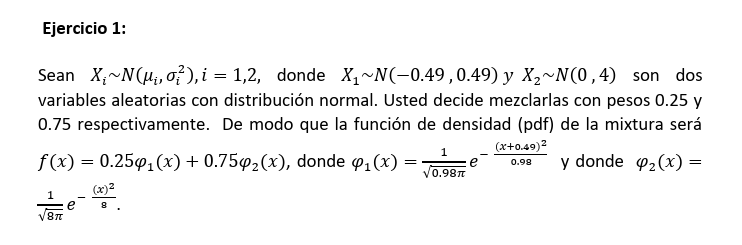

# a) Usando Excel, grafique la pdf de la mixtura para valores del soporte de la variable aleatoria entre -10 y 10 con deltas de 0,1.  

In [5]:
w1 = 0.25
mu1 = -0.49
var1 = 0.49

w2 = 0.75
mu2 = 0
var2 = 4

col_1 = np.arange(-10, 10.05, 0.1)
df = pd.DataFrame({"z": col_1})

df["pdf_w1"] = stats.norm.pdf(df["z"], loc=mu1, scale=var1**0.5)
df["pdf_w2"] = stats.norm.pdf(df["z"], loc=mu2, scale=var2**0.5)
df["pdf_mxtr"] = w1 * df["pdf_w1"] + w2 * df["pdf_w2"]
df.head(10)

,z,pdf_w1,pdf_w2,pdf_mxtr
0,-10.0,4.748880e-41,7.433598e-07,5.575198e-07
1,-9.9,3.273750e-40,9.533005e-07,7.149753e-07
2,-9.8,2.211244e-39,1.219480e-06,9.146103e-07
3,-9.7,1.463405e-38,1.556088e-06,1.167066e-06
4,-9.6,9.489193e-38,1.980650e-06,1.485487e-06
5,-9.5,6.028801e-37,2.514754e-06,1.886065e-06
6,-9.4,3.752921e-36,3.184913e-06,2.388684e-06
7,-9.3,2.288994e-35,4.023591e-06,3.017693e-06
8,-9.2,1.367908e-34,5.070426e-06,3.802820e-06
9,-9.1,8.009510e-34,6.373666e-06,4.780250e-06


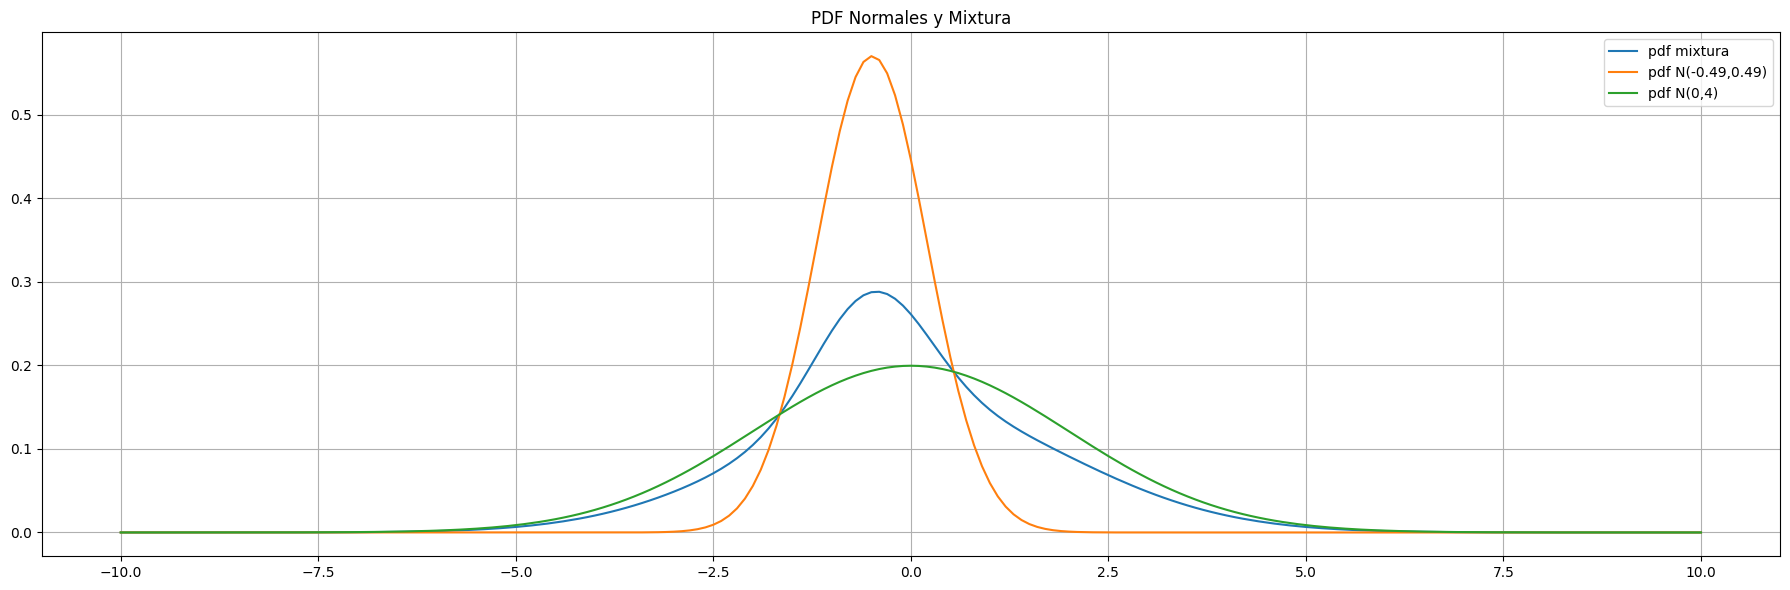

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(df["z"], df["pdf_mxtr"], label="pdf mixtura")
plt.plot(df["z"], df["pdf_w1"], label="pdf N(-0.49,0.49)")
plt.plot(df["z"], df["pdf_w2"], label="pdf N(0,4)")
plt.title("PDF Normales y Mixtura")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# b) Solamente observando el gráfico, ¿puede afirmar si esta mixtura es asimétrica? Explique.  
Mirando el grafico de la pdf de la mixtura se puede ver que que es asimétrica, esto es esperable ya que las medias de las dos normales no eran iguales.

# c) Calcule la media, la varianza, el coeficiente de asimetría y el de curtosis de la mixtura. Recuerde que esto requiere calcular varios momentos de la variable aleatoria, que, en definitiva, son integrales.

Traigo las funciones para calcular esos momentos

In [13]:
def media_mixtura(peso1, mu1, peso2, mu2):
    return peso1 * mu1 + peso2 * mu2


def varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return peso1 * (varianza1 + (mu1 - mu_mixtura) ** 2) + peso2 * (
        varianza2 + (mu2 - mu_mixtura) ** 2
    )


def desvio_std_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return np.sqrt(varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2))


def tercer_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return peso1 * (
        (mu1 - mu_mixtura) ** 3 + 3 * (mu1 - mu_mixtura) * varianza1
    ) + peso2 * ((mu2 - mu_mixtura) ** 3 + 3 * (mu2 - mu_mixtura) * varianza2)


def cuarto_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2):
    mu_mixtura = media_mixtura(peso1, mu1, peso2, mu2)
    return peso1 * (
        (mu1 - mu_mixtura) ** 4
        + 6 * (mu1 - mu_mixtura) ** 2 * varianza1
        + 3 * varianza1**2
    ) + peso2 * (
        (mu2 - mu_mixtura) ** 4
        + 6 * (mu2 - mu_mixtura) ** 2 * varianza2
        + 3 * varianza2**2
    )


def skewness(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return tercer_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2) / (
        desvio_std_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2) ** 3
    )


def kurtosis_total(peso1, varianza1, mu1, peso2, varianza2, mu2):
    return cuarto_momento_centrado(peso1, varianza1, mu1, peso2, varianza2, mu2) / (
        varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2) ** 2
    )


def estadisticos(peso1, varianza1, mu1, peso2, varianza2, mu2):
    print("Media:", media_mixtura(peso1, mu1, peso2, mu2))
    print(
        "Varianza:",
        round(varianza_mixtura(peso1, varianza1, mu1, peso2, varianza2, mu2), 5),
    )
    print(
        "Asimetría:", round(skewness(peso1, varianza1, mu1, peso2, varianza2, mu2), 5)
    )
    print(
        "Curtosis:",
        round(kurtosis_total(peso1, varianza1, mu1, peso2, varianza2, mu2), 5),
    )

In [14]:
estadisticos(w1, var1, mu1, w2, var2, mu2)

Media: -0.1225
Varianza: 3.16752
Asimetría: 0.16966
Curtosis: 3.64333


# d) ¿Es la mixtura leptocúrtica? Responda en función al valor que obtuvo en el inciso anterior y además muestre en un gráfico en Excel la pdf de la mixtura del gráfico anterior y la pdf de una normal con la misma media y varianza que la mixtura.  

La mixtura es leptocúrtica, ya que la curtosis es mayor a 3. La curtosis de la mixtura es 3.64. Esto significa que la mixtura tiene colas más pesadas en relación a una distribución normal. Además la asimetría dio distinto de cero, lo que confirma que la mixtura es asimétrica. En particular la mixtura es asimétrica positiva (cola derecha más pesada).

Graficamos ahora la pdf de la mixtura y de una normal con igual media y varianza.

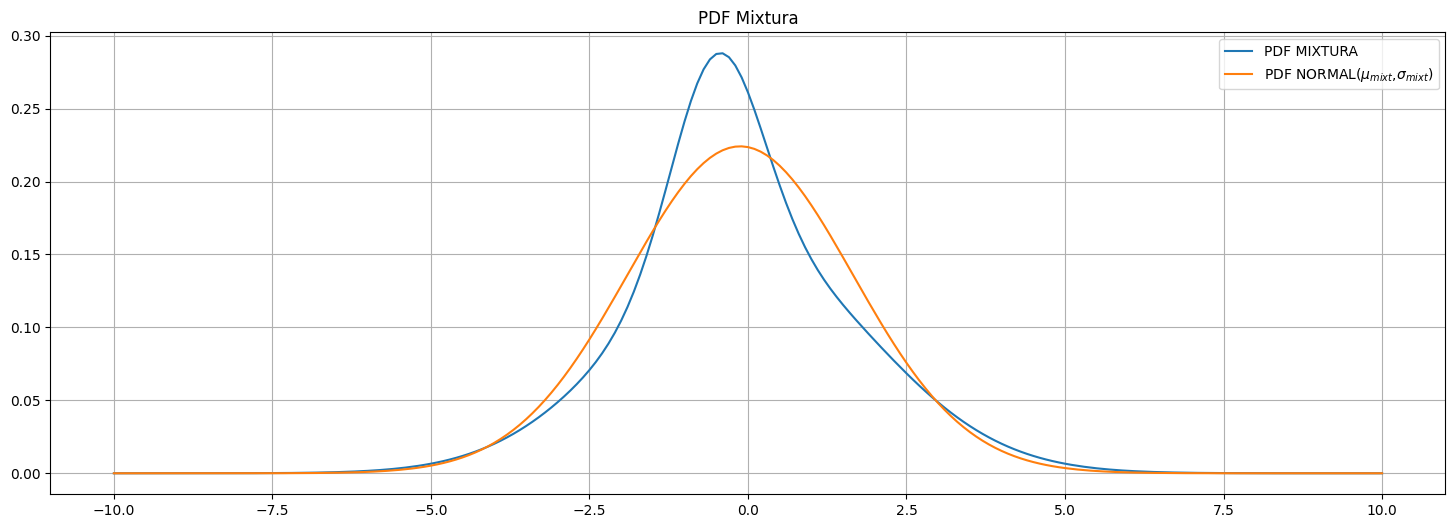

In [17]:
mu_mix = media_mixtura(w1, mu1, w2, mu2)
std_mix = desvio_std_mixtura(w1, var1, mu1, w2, var2, mu2)
df["pdf_normal"] = stats.norm.pdf(df["z"], loc=mu_mix, scale=std_mix)
plt.figure(figsize=(18, 6))
plt.plot(df["z"], df["pdf_mxtr"], label="PDF MIXTURA")
plt.plot(df["z"], df["pdf_normal"], label=r"PDF NORMAL($\mu_{mixt}$,$\sigma_{mixt}$)")
plt.title("PDF Mixtura")
plt.legend()
plt.grid(True)

Se puede ver facilmente del gráfico en la cola derecha que la mixtura tiene cola más pesada que la normal correspondiente con igual media y varianza (curva azul por arriba de la naranja).

# e) Genere 2000 valores aleatorios de esta mixtura y úselos para graficar un QQ-Plot. Muestre qué valores usó y el QQ-plot. 

Para generar la mixtura se generan valores aleatorios de ambas normales y luego se seleccionan aleatoriamente en función de sus pesos en la mixtura, generando el bootstrap.

In [ ]:
n = 2000
n1 = np.random.normal(mu1, np.sqrt(var1), size=n)  # w1 = 0.25
n2 = np.random.normal(mu2, np.sqrt(var2), size=n)  # w2 = 0.75
u01 = np.random.uniform(size=n)
bootstrap_mxt = np.where(u01 < w1, n1, n2)

promedio = bootstrap_mxt.mean()
desvio_std = bootstrap_mxt.std()
ke = stats.kurtosis(bootstrap_mxt)
asimetria = stats.skew(bootstrap_mxt)

# estandarizo para el QQ plot
boostrap_estandar = np.sort((bootstrap_mxt - promedio) / desvio_std)

print(f"Promedio: {promedio}")
print(f"Desvío std: {desvio_std}")
print(f"Asimetría: {asimetria}")
print(f"curtosis en exceso: {ke}")

df_bootstrap = pd.DataFrame(
    {
        "N(-0.49,0.49)": n1,
        "N(0,4)": n2,
        "U[0,1]": u01,
        "Bootstrap de Mixtura": bootstrap_mxt,
    }
)

Promedio: -0.1327596205367468
Desvío std: 1.796476190433012
Asimetría: 0.195775709209834
curtosis en exceso: 0.6201825158533545


## Podemos ver que al ser una muestra finita la media y la varianza no coinciden perfectamente con los valores de la mixtura teórica. La asimetría dio positiva y la curtosis en exceso dio positiva, manteniendose leptocutica asimetrica positiva.

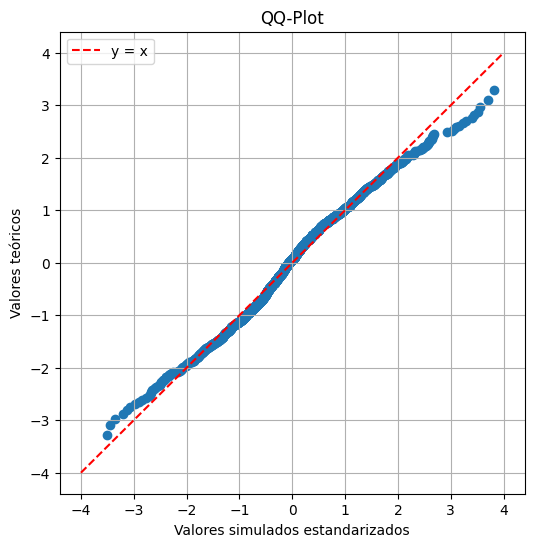

In [20]:
cuantiles_teoricos = stats.norm.ppf(np.arange(1, n + 1) / n)
plt.figure(figsize=(6, 6))
plt.scatter(boostrap_estandar, cuantiles_teoricos)
plt.plot([-4, 4], [-4, 4], "r--", label="y = x")
plt.xlabel("Valores simulados estandarizados")
plt.ylabel("Valores teóricos")
plt.title("QQ-Plot")
plt.grid(True)
plt.legend()
plt.show()

## Podemos ver que los valores teóricos van en el rango aprox de [-3,3], mientras que por ejemplo para los valores observados en la cola derecha podemos ver valores cercanos al 4, esto nos habla de la leptocurtosis.

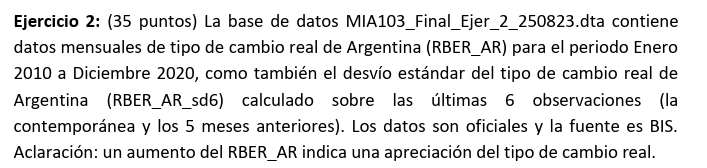

# a) Muestre un gráfico de las series de tiempo  

In [46]:
df = pd.read_stata("MIA103_Final_Ejer_2_250823.dta")
print(df.columns.tolist())

['RBER_AR', 'RBER_AR_sd6', 't']


In [ ]:
# seteo el indice como year_month con formato correcto para no tener warnings en los modelos
inicio = pd.to_datetime(df["t"].iloc[0], format="%b-%y").strftime("%Y-%m")
df["yearmm"] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("yearmm")

In [ ]:
df["RBER_AR"] = df["RBER_AR"].astype(float)
df["RBER_AR_sd6"] = df["RBER_AR_sd6"].astype(float)
df.head()

,RBER_AR,RBER_AR_sd6,t
yearmm,,,
2010-01,98.870003,1.225477,2010-01-01
2010-02,100.620003,1.976474,2010-02-01
2010-03,99.820000,2.138749,2010-03-01
2010-04,99.349998,1.786254,2010-04-01
2010-05,102.059998,1.618118,2010-05-01


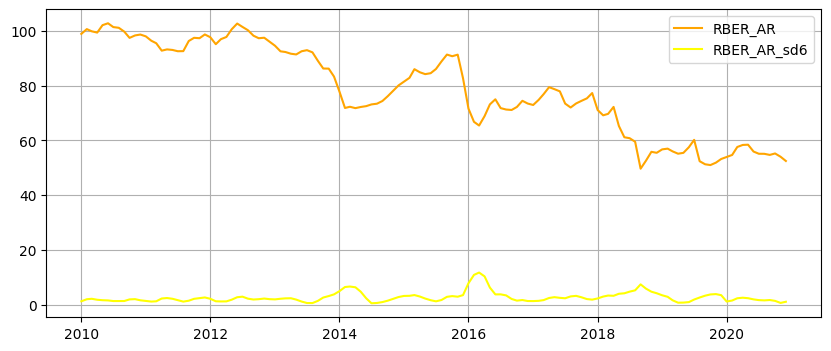

In [51]:
plt.figure(figsize=(10, 4))
plt.plot(df["t"], df["RBER_AR"], label="RBER_AR", color="orange")
plt.plot(df["t"], df["RBER_AR_sd6"], label="RBER_AR_sd6", color="yellow")
plt.legend()
plt.grid(True)
plt.show()

Del gráfico parece que la serie de tipo de cambio (RBER_AR) no es estacionaria, mientras que RBER_AR_sd6 parece estacionaria.

# b) ¿Cuál es el orden de integración de estas dos series de tiempo? 

## **RBER_AR**

Chequeo de estacionariedad utilizando la prueba de Dickey-Fuller GLS

In [ ]:
print("DFGLS sin tendencia determinística ")
test = DFGLS(df["RBER_AR"].dropna(), trend="c")
print(test.summary())

DFGLS sin tendencia determinística 
      Dickey-Fuller GLS Results      
Test Statistic                  0.108
P-value                         0.729
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.72 (1%), -2.10 (5%), -1.78 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


En el DFGLS de statsmodels
* El lag máximo para usar en el test se calcula con el criterio de Schwert.
* El lag óptimo se calcula por default con AIC.

## El p-value>0.05, no rechazamos la hipótesis nula de raiz unitaria, es decir, no rechazamos la hipótesis de que la serie RBER_AR es no estacionaria.  

## Voy a tomar diferencias

In [53]:
df["diff_RBER_AR"] = df["RBER_AR"] - df["RBER_AR"].shift(1)

In [ ]:
print("DFGLS sin tendencia determinística ")
test = DFGLS(df["diff_RBER_AR"].dropna(), trend="c")
print(test.summary())

DFGLS sin tendencia determinística 
      Dickey-Fuller GLS Results      
Test Statistic                 -5.912
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.72 (1%), -2.10 (5%), -1.78 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Ahora el p-value <0.05, puedo rechazar la hipótesis nula de raiz unitaria. La serie de diferencias de RBER_AR es estacionaria. Habiendo dicho eso RBER_AR es integrada de orden 1 **I(1)**

## **RBER_AR_sd6**

In [ ]:
print("DFGLS sin tendencia determinística ")
test = DFGLS(df["RBER_AR_sd6"].dropna(), trend="c")
print(test.summary())

DFGLS sin tendencia determinística 
      Dickey-Fuller GLS Results      
Test Statistic                 -3.505
P-value                         0.001
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.72 (1%), -2.10 (5%), -1.78 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## El p-value =0.001 nos deja rechazar la hipotesis nula de raiz unitaria con un nivel de significancia de hasta 0.1%. Rechazo la hipótesis nula, la serie RBER_AR_sd6 es estacionaria. No tuve que tomara diferencias por lo que RBER_AR_sd6 es integrada de orden cero **I(0)**.

# c) Estime un modelo VAR. Si alguna de las series presenta una tendencia determinística, remuévala previamente. En base al VAR estimado, ¿alguna de las variables causa en sentido de Granger a la otra?  

## Para estimar un modelo VAR necesito series estacionarias. Para eso voy a usar las series diff_RBER_AR (primeras diferencias de RBER_AR) y RBER_AR_sd6.

## Los lags del modelo VAR no se pueden elegir arbitrariamente, necesito elegirlos segun un criterio de optimalidad. Para eso corro el select order de abajo:

In [ ]:
model = VAR(df[["RBER_AR_sd6", "diff_RBER_AR"]].dropna())
lag_selection = model.select_order()
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.273       3.320       26.40       3.292
1        1.426       1.566       4.160       1.483
2       1.030*      1.265*      2.802*      1.125*
3        1.051       1.380       2.862       1.185
4        1.103       1.526       3.015       1.275
5        1.089       1.605       2.973       1.298
6        1.065       1.676       2.907       1.313
7        1.099       1.804       3.010       1.385
8        1.126       1.924       3.095       1.450
9        1.143       2.035       3.155       1.506
10       1.168       2.155       3.242       1.569
11       1.201       2.281       3.356       1.639
12       1.155       2.329       3.216       1.632
13       1.203       2.471       3.384       1.717
--------------------------------------------------


# Hay casos en donde el número de lags óptimo a considerar es diferente según el criterio. Acá las 4 medidas (AIC, BIC, FPE y HQIC) marcan el lag óptimo a considerar como 2. 

## Fitteo un VAR(2) bivariado.

In [61]:
var_model = model.fit(2)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Aug, 2025
Time:                     11:29:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.11840
Nobs:                     129.000    HQIC:                  0.986788
Log likelihood:          -413.924    FPE:                    2.45172
AIC:                     0.896710    Det(Omega_mle):         2.27216
--------------------------------------------------------------------
Results for equation RBER_AR_sd6
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.557585         0.112235            4.968           0.000
L1.RBER_AR_sd6          1.317808         0.082157           16.040           0.000
L1.diff_RBER_AR        -0.070157         0.027

### De los p-values podemos ver que para RBER_AR_sd6 la variable explicativa correspondiente al segundo rezago diff_RBER_AR tiene un p-value alto (no son estadisticamente significativos). Para diff_RBER_AR el primer y segundo rezago de RBER_AR_sd6, y el segundo rezago de diff_RBER_A tiene p-value alto.

### Estabilidad del VAR (chequeo que no haya raices unitarias)

In [ ]:
roots = var_model.roots
print("Raíces del VAR(2):")
print(np.abs(roots))  # quiero que sean mayores a 1

Raíces del VAR(2):
[2.4770902  2.4770902  1.31695572 1.31695572]


## Todas las raices están fuera del círculo unitario, es estable

## Veamos causalidad en el sentido de Granger

### Veo si "diff_RBER_AR" causa a "RBER_AR_sd6" en el sentido de Granger

In [63]:
print(var_model.test_causality("RBER_AR_sd6", ["diff_RBER_AR"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: diff_RBER_AR does not Granger-cause RBER_AR_sd6: reject at 5% significance level. Test statistic: 3.806, critical value: 3.032>, p-value: 0.024>


* El p-value=0.024. Si tomamos un nivel de significancia del 5%, puedo rechazar la hipótesis nula de que diff_RBER_AR no causa en el sentido de Granger a RBER_AR_sd6.
* Es decir tenemos evidencia estadística para afirmar que diff_RBER_AR causa en el sentido de Granger a RBER_AR_sd6. 
* La variable diff_RBER_AR y sus rezagos explican a RBER_AR_sd6.

### Veo si "RBER_AR_sd6" causa a "diff_RBER_AR" en el sentido de Granger

In [64]:
print(var_model.test_causality("diff_RBER_AR", ["RBER_AR_sd6"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_sd6 does not Granger-cause diff_RBER_AR: fail to reject at 5% significance level. Test statistic: 0.352, critical value: 3.032>, p-value: 0.704>


* El p-value=0.704. Si tomamos un nivel de significancia del 5%, **NO** puedo rechazar la hipótesis nula de que RBER_AR_sd6 no causa en el sentido de Granger a diff_RBER_AR.
* Es decir no tenemos evidencia estadística para afirmar que RBER_AR_sd6 causa en el sentido de Granger a diff_RBER_AR. 

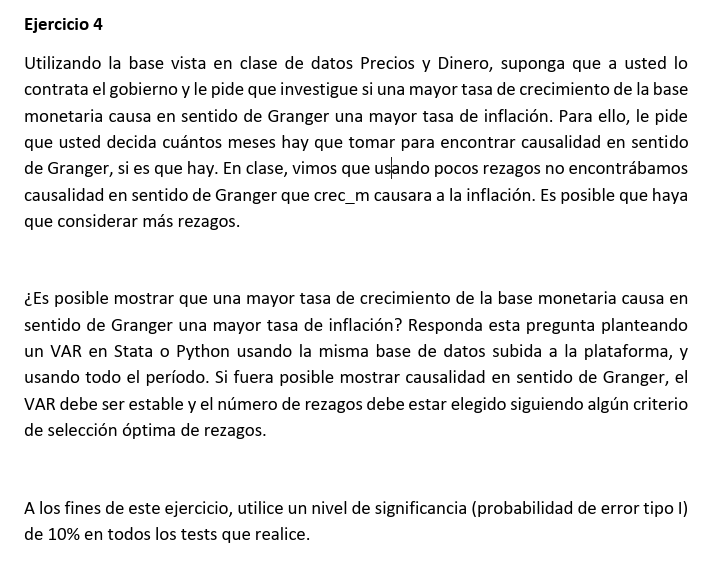

In [72]:
df = pd.read_stata("Precios_y_Dinero_data.dta")
print(df.columns.tolist())

['mmyy', 'ipc', 'm', 'm_en_ars']


In [ ]:
# seteo bien los astypes y el indice de fecha con su formato
inicio = pd.to_datetime(df["mmyy"].iloc[0], format="%b-%y").strftime("%Y-%m")
df["yearmm"] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("yearmm")
df["ipc"] = df["ipc"].astype(float)
df["m"] = df["m"].astype(float)
df.head()

,mmyy,ipc,m,m_en_ars
yearmm,,,,
2003-01,Jan-03,100.00,100.00,29609.92
2003-02,Feb-03,100.57,99.36,29420.37
2003-03,Mar-03,101.16,102.63,30388.08
2003-04,Apr-03,101.21,104.26,30870.99
2003-05,May-03,100.82,111.80,33105.17


Generamos las variables Inflación y Tasa de Crecimiento de la Base Monetaria

In [74]:
df["infl"] = df["ipc"] / df["ipc"].shift(1) - 1
df["crec_m"] = df["m"] / df["m"].shift(1) - 1

In [76]:
model_crec = VAR(df[["infl", "crec_m"]].dropna())
lag_selection_crec = model_crec.select_order()
print(lag_selection_crec.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.27      -16.24   8.561e-08      -16.26
1       -16.73     -16.62*   5.441e-08      -16.68
2       -16.79      -16.60   5.127e-08      -16.71
3       -16.83      -16.57   4.923e-08     -16.72*
4       -16.82      -16.49   4.935e-08      -16.69
5       -16.81      -16.40   5.025e-08      -16.64
6       -16.82      -16.34   4.960e-08      -16.63
7       -16.84      -16.29   4.863e-08      -16.62
8       -16.83      -16.20   4.918e-08      -16.57
9       -16.81      -16.11   5.025e-08      -16.52
10      -16.87      -16.10   4.714e-08      -16.56
11      -16.86      -16.01   4.764e-08      -16.52
12      -16.98      -16.06   4.232e-08      -16.61
13     -16.99*      -15.99  4.225e-08*      -16.58
14      -16.95      -15.88   4.377e-08      -16.52
--------------------------------------------------


## Habiamos visto que tomando pocos rezagos no encontrabamos que crec_m causara a inflacion en el sentido de Granger. Voy a tomar más rezagos, en particular 13 que son los óptimos según los criterios de AIC y FPE.

In [77]:
var_model_crec = model_crec.fit(13)
print(var_model_crec.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Aug, 2025
Time:                     12:11:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.9800
Nobs:                     171.000    HQIC:                  -16.5695
Log likelihood:           1019.84    FPE:                4.27989e-08
AIC:                     -16.9721    Det(Omega_mle):     3.19223e-08
--------------------------------------------------------------------
Results for equation infl
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.002922         0.002082            1.403           0.161
L1.infl            0.488500         0.085379            5.722           0.000
L1.crec_m          0.011412         0.028064            0.407           0

# Chequeo la estabilidad

In [ ]:
roots_crec = var_model_crec.roots
print(np.abs(roots_crec))  # quiero que sean mayores a 1

[278.94375331   1.33799332   1.33799332   1.22856752   1.22856752
   1.16270682   1.16270682   1.16269651   1.16269651   1.14622214
   1.13280445   1.1178931    1.1178931    1.11617063   1.11617063
   1.10300024   1.10300024   1.08637644   1.07341204   1.07341204
   1.05721376   1.05721376   1.04579293   1.04579293   1.0153434
   1.0153434 ]


## Son todas mayores a 1 en modulo, pero igualmente cercanas a 1.

### Veo si "crec_m" causa a "infl" en el sentido de Granger

In [80]:
print(var_model_crec.test_causality("infl", ["crec_m"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause infl: fail to reject at 5% significance level. Test statistic: 1.717, critical value: 1.754>, p-value: 0.057>


* El p-value=0.057. Si tomamos un nivel de significancia del 10% (0.1), puedo rechazar la hipótesis nula de que crec_m no causa en el sentido de Granger a infl.
* Es decir que tomando 13 rezagos tenemos evidencia estadística para afirmar que el crecimiento de la base monetaria causa en el sentido de Granger a la inflacion. 

### Veo por completitud si "infl" causa a "crec_m" en el sentido de Granger

In [81]:
print(var_model_crec.test_causality("crec_m", ["infl"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: infl does not Granger-cause crec_m: reject at 5% significance level. Test statistic: 1.782, critical value: 1.754>, p-value: 0.045>


* El p-value= 0.045. Si tomamos un nivel de significancia del 10% (0.1), puedo rechazar la hipótesis nula 
* Es decir que tomando 13 rezagos tenemos evidencia estadística también para afirmar que la inflación causa en el sentido de Granger al crecimiento de la base monetaria.